# Realizzazione di Grafici e Visualizzazione dei Dati 

In questo *notebook* affronteremo il problemma della visualizzazione dei dati. In generale ci potremmo trovare a dover costruire un grafico in due situazioni diverse:
1. durante l'analisi esplorativa del dataset
2. durante la fase finale dell'analisi per mostrare i risultari ottenuti

La trattazione sara cosi suddivisa: 
- Grafici Statici: Matplotlib
  - Introduzione all'API
  - Integrazione con Pandas e Seaborne
- Grafici Dinamici: Vega Altair

Le librerie che utilizzeremo saranno: 

In [1]:
import pandas as pd
import numpy as np

## Grafici Statici: Matplotlib

In [2]:
%matplotlib inline

*Matplotlib* e il cavalo di battaglia in *python* per la creazione di grafici. Permette di visualizzare i dati in molti modi differenti, creando grafici diversi. I grafici che creeremo saranno statici e non interattivi. Il risultato del nostro codice sara un'immagine. 

L'oggetto principale presente all'interno della libreria e il *pyplot*, comunemente chiamato *plot*. 

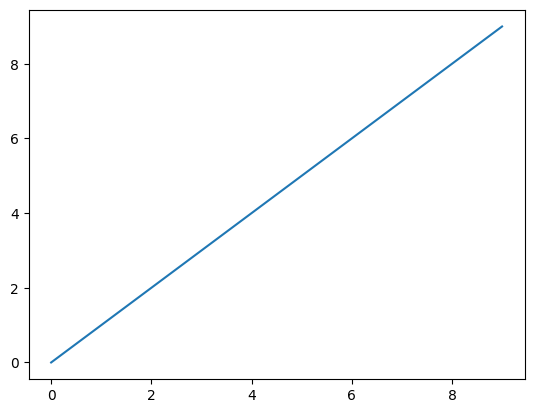

In [3]:
import matplotlib.pyplot as plt

array = pd.Series(np.arange(10))
plt.plot(array)

> 🐦‍⬛ **Trattazione Completa**
>
> La libreria *matplotlib* non puo essere completamente trattata nel corso di questo notebook. Ci limiteremo solamente a vedere i fondamentali. Per chi volesse ulteriormente approfondire, si consiglia di dare un occhio alla [documentazione](https://matplotlib.org/).

### Introduzione all'API

#### Figure e sottografici

I grafici in *matplotlib* risiedono in un oggetto chiamato `figure`. Questo oggetto permette di specificare quanti sottografici vogliamo all'interno della nostra figura. 

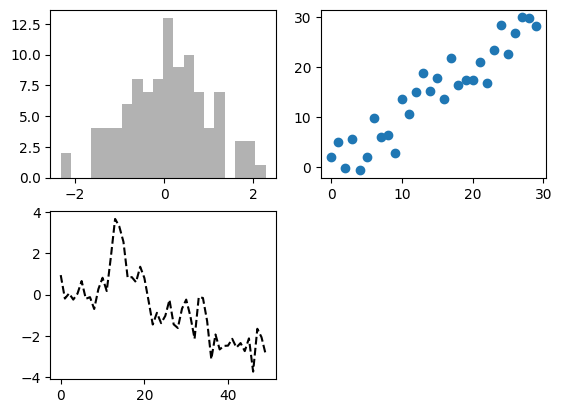

In [4]:
# figura con 4 grafici organizzati su due righe diverse
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1) # primo grafico
ax2 = fig.add_subplot(2,2,2) # secondo grafico
ax3 = fig.add_subplot(2,2,3) # terzo grafico

# creazione dei grafici
ax3.plot(np.random.standard_normal(50).cumsum(), color = 'black', linestyle = 'dashed');
ax1.hist(np.random.standard_normal(100), bins = 20, color = 'black', alpha = 0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.standard_normal(30)) # type: ignore

Una volta che abbiamo deciso quanti grafici vogliamo nella nostra figura, possiamo identificare uno d questi grafici. L'oggetto che permette di farlo si chiama `Axes` e dispone di una serie di attributi e metodi che ne rendono semplice l'utilizzo. 

In [5]:
# axes object
ax3 

<Axes: >

Esiste un metodo piu veloce, utilizzando la funzione `matplotlib.pyplot.subplots`, i cui parametri fondamentali sono: 
1. `nrows`: numero di righe di sottografici [int]
2. `ncols`: numero di colonne di sottografici [int]
3. `sharex`\ `sharey`: tutti grafici devono utilizzare lo stesso asse x\y [bool]
4. `subplot_kw`: dizionario di parametri per i *subplot* che poi possono essere utilizzati dalla funzione `figure.add_suplot` per la creazione del grafico

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

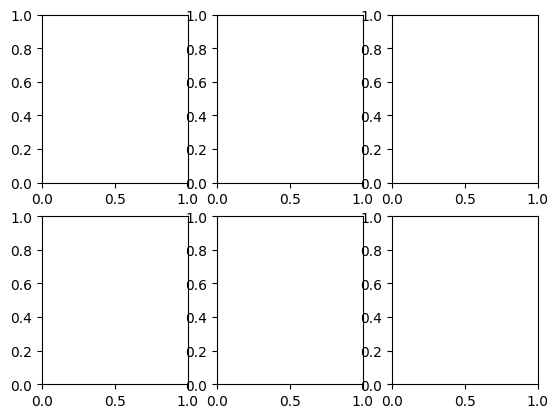

In [6]:
# generazione di una figure con 3 axes (plot) 
fig, axes = plt.subplots(2, 3)

# aggiustare la spaziatura
fig.subplots_adjust(left=None, bottom=None,)

axes

In [7]:
plot_firstrow_center = axes[0,1]

#### Colori, Marker e Linee

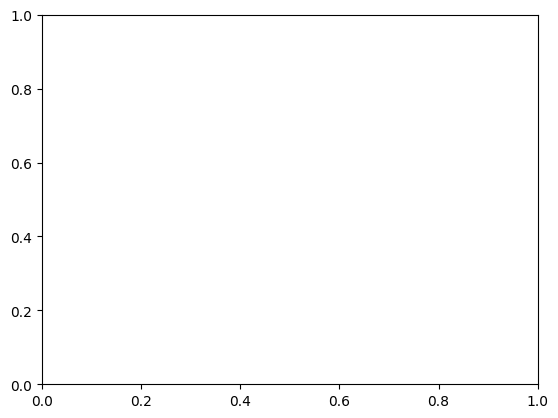

In [8]:
# tela bianca
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

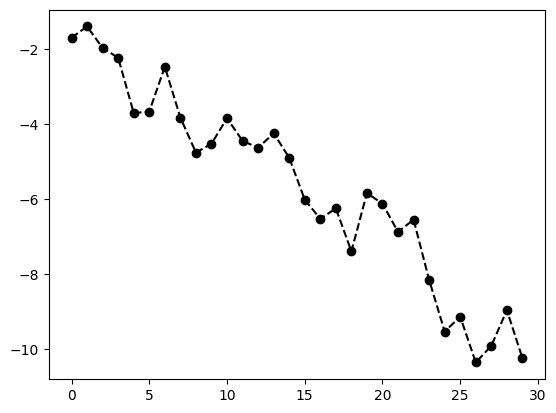

In [9]:
ax.plot(np.random.standard_normal(30).cumsum(), color = 'black', linestyle = 'dashed', marker = 'o')
fig

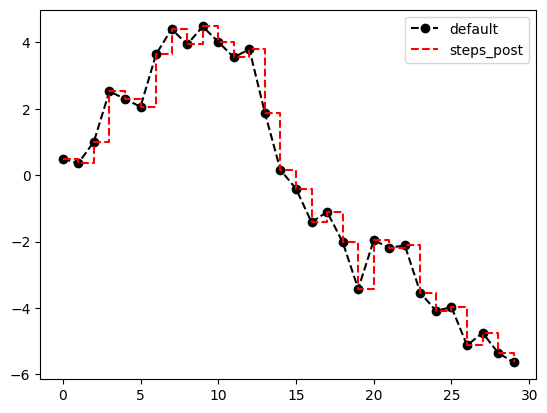

In [10]:
np.random.seed(42)

# decidere il tipo di interpolazione fra punti 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = np.random.standard_normal(30).cumsum()
ax.plot(data, marker = 'o', color = 'black', linestyle = 'dashed', label = 'default')
ax.plot(data, color = 'red', linestyle = 'dashed', label = 'steps_post', drawstyle = 'steps-post')
ax.legend()

#### Tick, etichette e legenda

La maggior parte delle decorazioni di un *plot* possono essere modificate tramite appositi metodi di *matplotlib*.

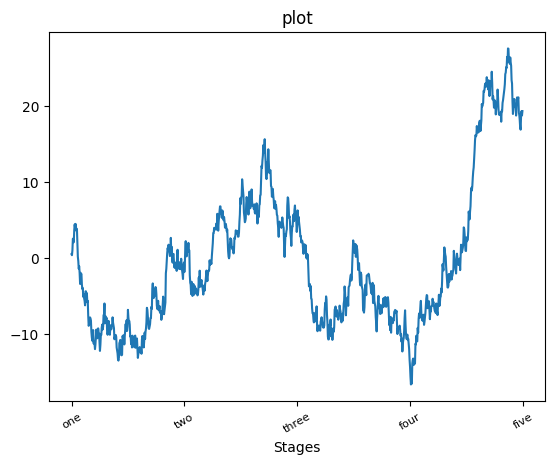

In [11]:
# implementazione precisa
np.random.seed(42)
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation = 30, fontsize = 8)
x_label = ax.set_xlabel('Stages');
ax.set_title('plot');

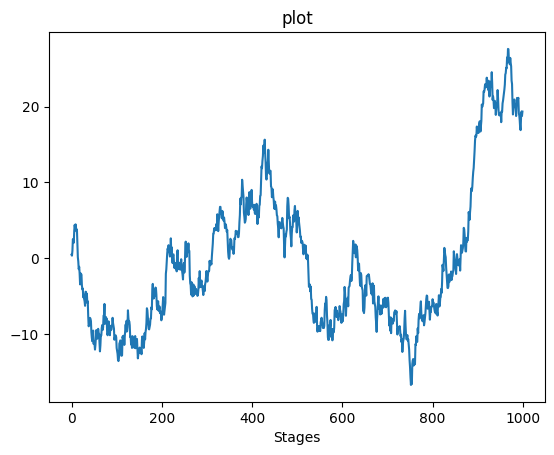

In [12]:
# implementazione veloce
np.random.seed(42)
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ax.set(title = 'plot', xlabel = 'Stages');

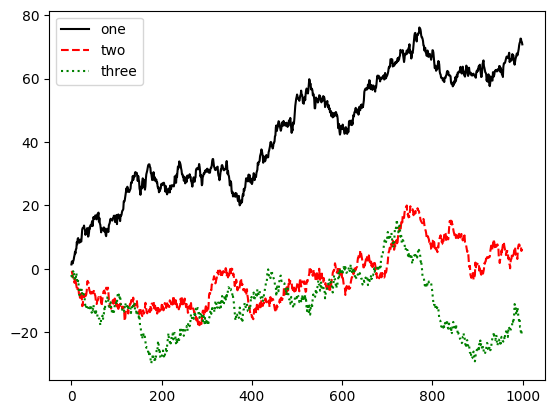

In [13]:
# legenda 
fig, ax = plt.subplots();

ax.plot(np.random.standard_normal(1000).cumsum(), color = 'black', label = 'one');
ax.plot(np.random.standard_normal(1000).cumsum(), color = 'red', linestyle = 'dashed', label = 'two');
ax.plot(np.random.standard_normal(1000).cumsum(), color = 'green', linestyle = 'dotted', label = 'three');
ax.legend();

### Integrazione con *pandas* e *seaborne*

La libreria *matplotlib* e di livello abbastanza basso. E possibile creare un grafico con un numero virtualmente arbitrario di decorazioni. Esistolo librerie di livello piu elevato che permettono di rendere piu snello il procedimento. Una di queste e *seaborne*. 

Inoltre, *pandas* utilizza automaticamente *matplotlib* per generare dei grafici a partire da `Series` e `DataFrame`.

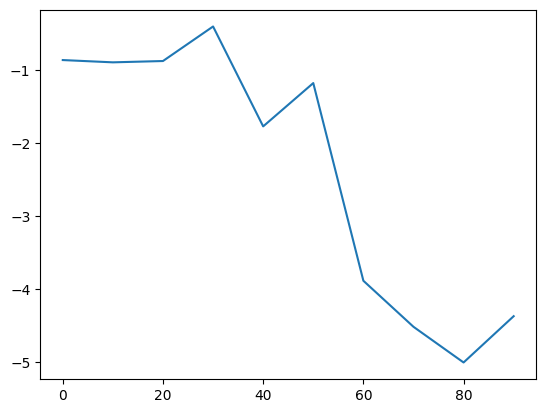

In [14]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index = np.arange(0,100, 10))
s.plot();

> `Series.plot`
>
> Questa funzione possiede molti parametri, che permettono di ottenere un grafico in maniera veloce a partire dalla `Series`. Per chi volesse approfondire: [documentazione](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html).
> 

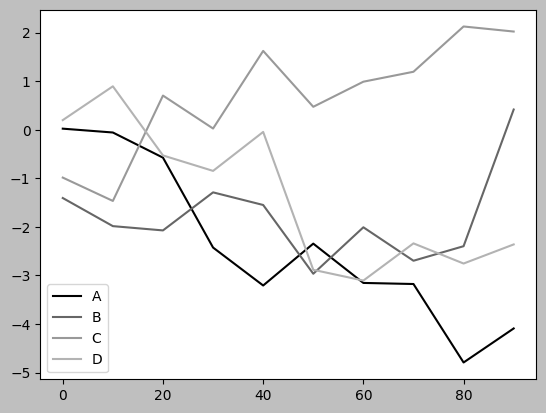

In [15]:
df = pd.DataFrame(np.random.standard_normal((10,4)).cumsum(0), 
                  columns = ['A', 'B', 'C', 'D'],
                  index = np.arange(0,100,10))
plt.style.use('grayscale')
df.plot();

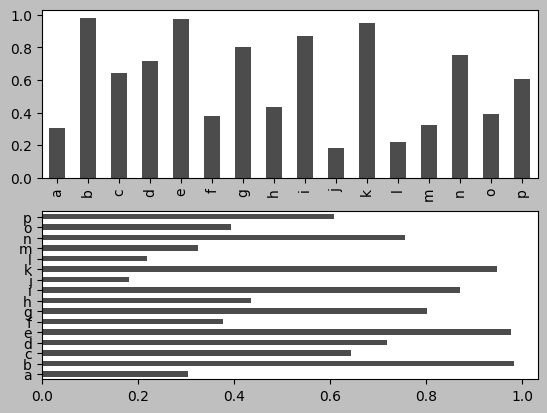

In [20]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size = 16), index = list('abcdefghijklmnop'));
data.plot.bar(ax=axes[0], color = 'black', alpha = 0.7);
data.plot.barh(ax=axes[1], color = 'black', alpha = 0.7);

In [21]:
df = pd.DataFrame(
    np.random.uniform(size = (6, 4)),
    index = ['one', 'two', 'three', 'four', 'five', 'six'],
    columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus')
)
df

Genus,A,B,C,D
one,0.444574,0.742370,0.228331,0.058458
two,0.299929,0.474309,0.168020,0.354797
three,0.399983,0.057392,0.583307,0.884343
four,0.151743,0.597808,0.664739,0.419335
five,0.701098,0.410732,0.504637,0.007353
six,0.691720,0.661343,0.038401,0.368250


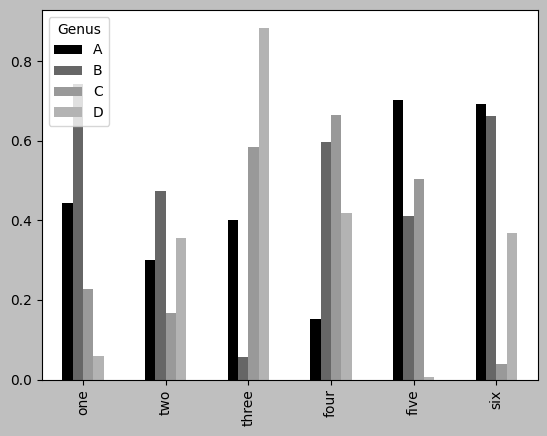

In [23]:
df.plot.bar();

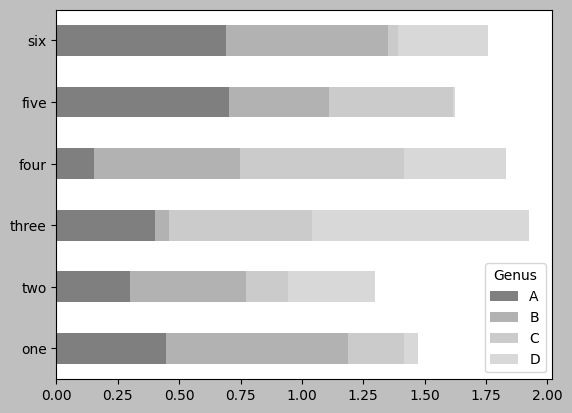

In [24]:
df.plot.barh(stacked = True, alpha = 0.5);

In [25]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
# tabella di frequenza: numero di mance per giorno
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.reindex(index = ['Thur', 'Fri', 'Sat', 'Sun'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [27]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(axis = 'columns'), axis = 'index')
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


In [ ]:
# tips % of the final bill 
import seaborn as sns 
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips.head()  

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

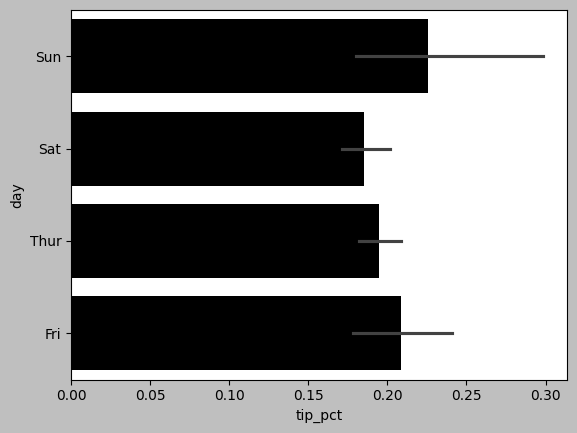

In [29]:
sns.barplot(x='tip_pct', y='day', data = tips, orient = 'h')

In questo caso si noti come venga automaticamente calcolato un intervallo di confidenza al 95% per il valore della varaibile. 

<Axes: xlabel='tip_pct', ylabel='day'>

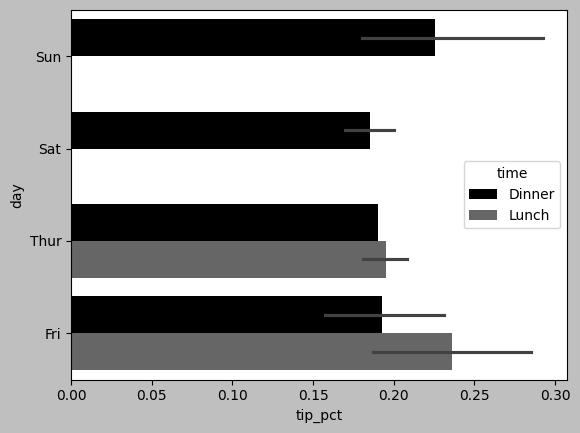

In [ ]:
# splitting he bar wrt a particular value
sns.barplot(x='tip_pct', y = 'day', hue = 'time', data = tips, orient = 'h')

<Axes: xlabel='tip_pct', ylabel='day'>

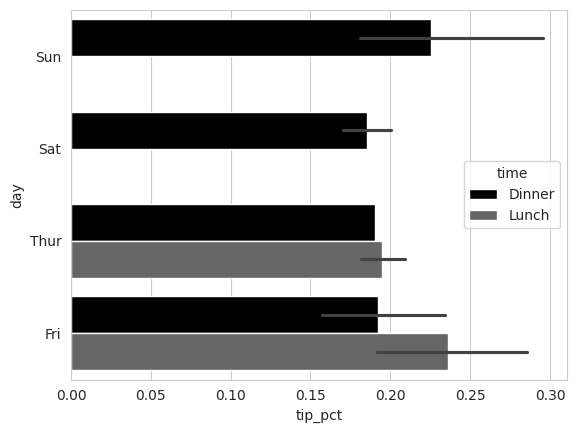

In [32]:
# styling 
sns.set_style('whitegrid')
sns.barplot(x='tip_pct', y = 'day', hue = 'time', data = tips, orient = 'h')


#### Istogrammi per le distribuzioni di probabilita

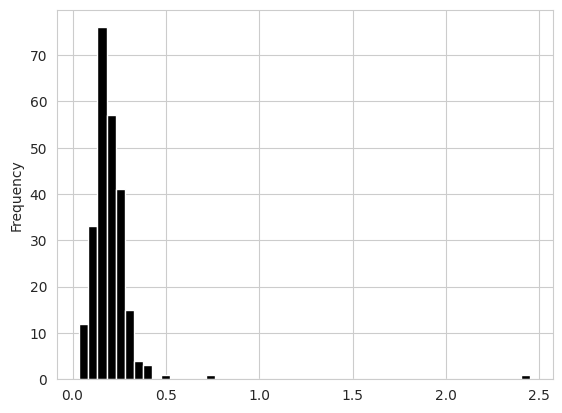

In [37]:
tips['tip_pct'].plot.hist(bins = 50);

<Axes: ylabel='Density'>

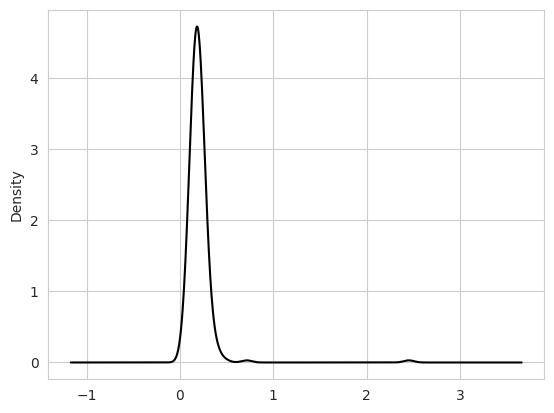

In [ ]:
# using a mixture of normals to approximate the distribution of tip_pct variable
tips['tip_pct'].plot.density()

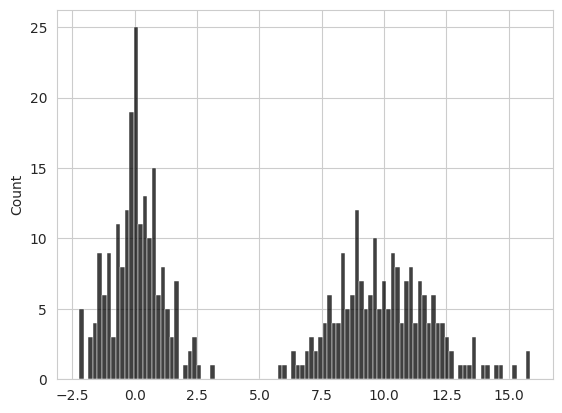

In [ ]:
camp1 = np.random.standard_normal(200)
camp2 = 2*np.random.standard_normal(200) + 10
values = pd.Series(np.concatenate([camp1, camp2])) # long vector stacking camp1 and camp2
sns.histplot(values, bins = 100, color = 'black'); # pyright: ignore[reportArgumentType]

#### Diagrammi di dispersione (scatter plot)

In [ ]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

# calcolo dello scarto rispetto all'elemento nella riga precedente
trans_data = np.log(data).diff().dropna() # type: ignore
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


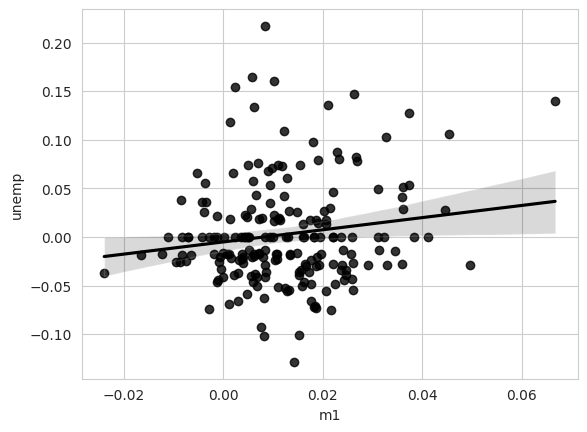

In [50]:
ax = sns.regplot(x = 'm1', y = 'unemp', data = trans_data)

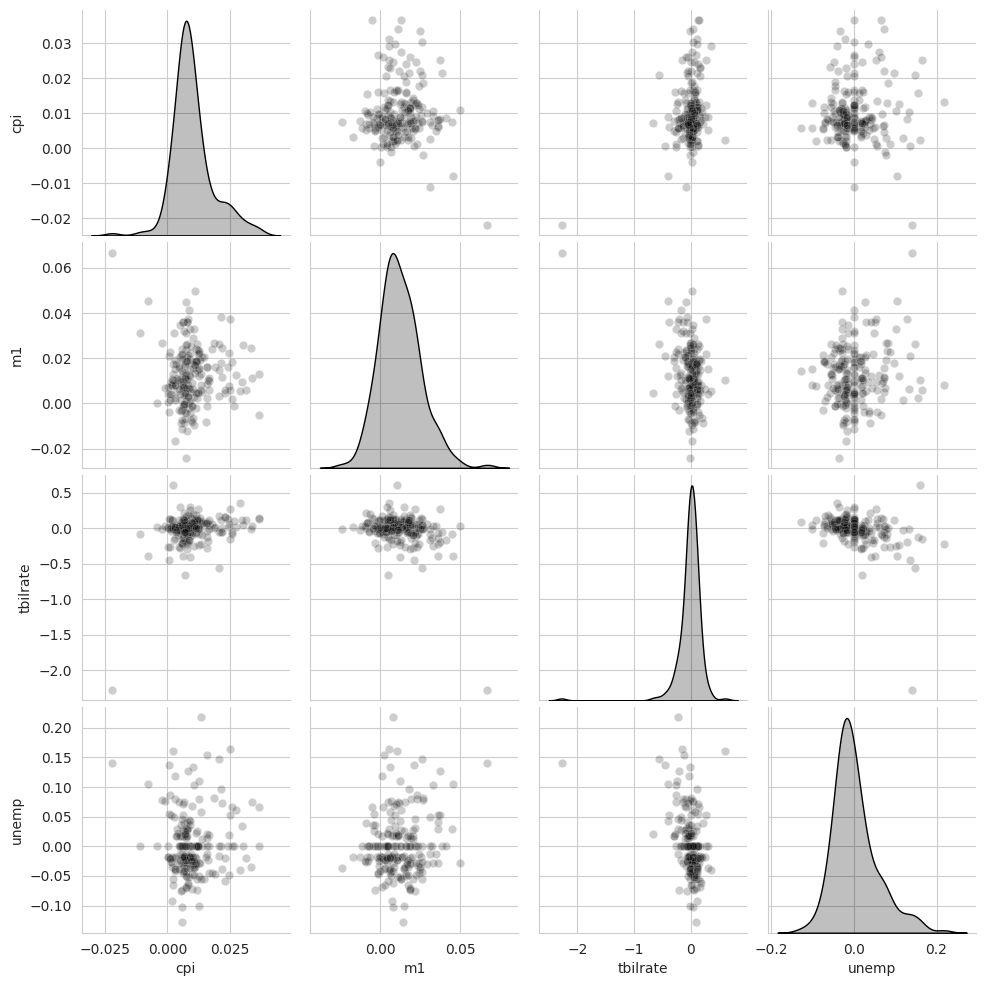

In [ ]:
# matrix of scatter plots with seaborne 
sns.pairplot(trans_data, diag_kind = 'kde', plot_kws = {'alpha' : 0.2});